In [1]:
from SALib.analyze.sobol import analyze
from SALib.sample.sobol import sample
from SALib.test_functions import Ishigami
import numpy as np

# Define the model inputs
problem = {
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
}

# Generate samples
param_values = sample(problem, 1024)

# Run model (example)
Y = Ishigami.evaluate(param_values)

# Perform analysis
Si = analyze(problem, Y, print_to_console=True)

# Print the first-order sensitivity indices
print(Si['S1'])

          ST   ST_conf
x1  0.560505  0.092197
x2  0.444248  0.044390
x3  0.250178  0.025524
          S1   S1_conf
x1  0.313721  0.064177
x2  0.439882  0.059959
x3  0.006387  0.051257
                S2   S2_conf
(x1, x2)  0.004646  0.088443
(x1, x3)  0.248319  0.099071
(x2, x3)  0.004141  0.063661
[0.31372108 0.4398819  0.00638729]


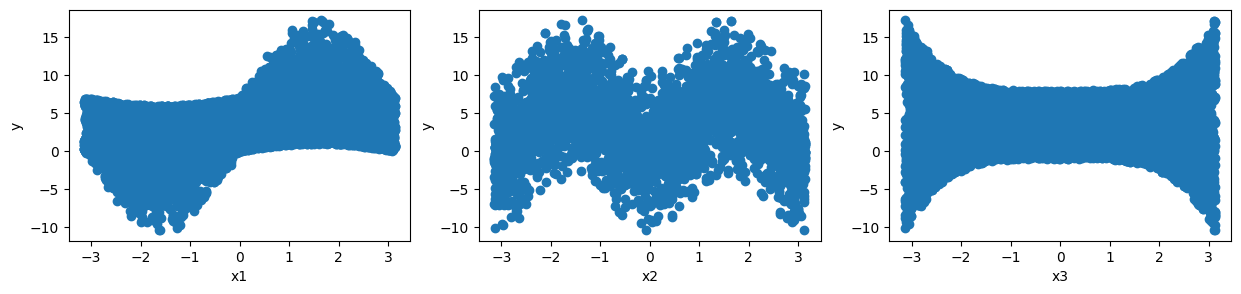

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15, 3))
for i in range(3):
    ax[i].scatter(param_values[:, i], Y)
    ax[i].set_xlabel(problem['names'][i])
    ax[i].set_ylabel('y')
plt.show()

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object)

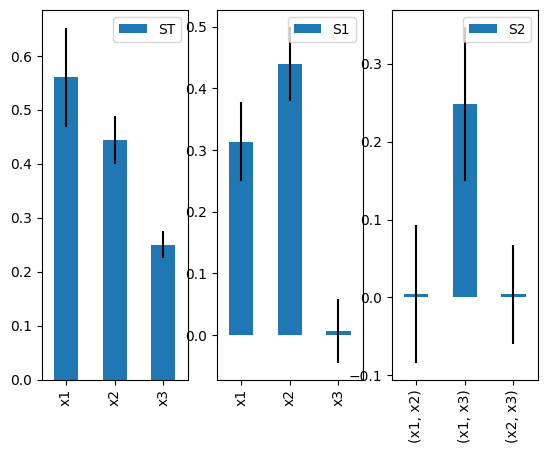

In [3]:
Si.plot()